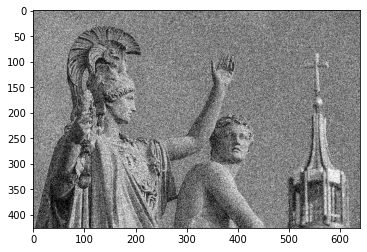

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load Image
img_dir = "statue.jpg"
img_pil = Image.open(img_dir).convert('L')
image = np.array(img_pil)/255

# Add Noise
st = 0.15
gaussian = np.random.normal(0, st, (image.shape[0],image.shape[1])) 
img = np.clip(image + gaussian, 0, 1)

plt.imshow(img,cmap="gray")
plt.show()


## Medianfilter Slow

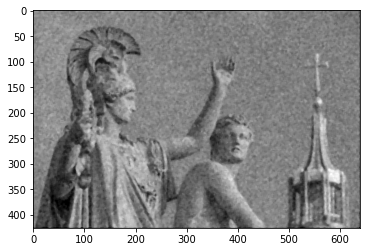

In [2]:
patchsize = 5

nx,ny = img.shape
img_pad = np.pad(img,patchsize//2)
img_res = np.copy(img)

# Loop over pixel
for i in range(nx):
    for j in range(ny):
        
        # Median of Patch
        img_res[i,j] = np.median(img_pad[i:(i+patchsize), j:(j+patchsize)])


plt.imshow(img_res,cmap="gray")
plt.show()

## Medianfilter Fast

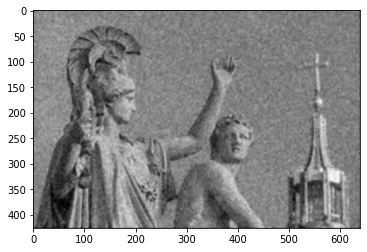

In [10]:
from patchify import patchify

# Patchsize
psize = 5

# Pad
padded = np.pad(img,psize//2)

#Patchify
patched = patchify(padded,psize)
x,y,z1,z2 = patched.shape

# Median
res = np.median(patched,axis=[2,3])
           #####alternativ#####
# ein_patch_median = np.median(patched[0,0,:,:])
# res = np.median(patched[:,:,:,:], axis=[2,3])

plt.imshow(res,cmap="gray")
plt.show()